In [1]:
%load_ext autoreload
%autoreload 2
from contexttimer import Timer
import numpy as np
import pandas as pd
import motorshed

import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    """Convenience fxn to render a bytes array (default png format) in a notebook."""
    a = np.uint8(a)
    with BytesIO() as f:
        PIL.Image.fromarray(a).save(f, fmt)
        IPython.display.display(IPython.display.Image(data=f.getvalue()))


In [2]:
# DEFINE what map to show.

# New York Stock Exchange
# address = '11 Wall Street New York, NY'
# distance = 5_000

# White House
address = '1600 Pennsylvania Avenue, Washington DC'
distance = 2_000

In [3]:
# Get map and transit times.
#  If you run multiple times, it will be cached and much faster.
with Timer(prefix='Get map'):
    G, center_node, origin_point = motorshed.overpass.get_map(address, distance=distance)

with Timer(prefix='Get transit times'):
    motorshed.osrm.get_transit_times(G, center_node)


Cache miss. Loading.
here
here
here
Get map took 65.565 seconds
osrm table api took 0.318 seconds
osrm table api took 0.173 seconds
osrm table api took 0.166 seconds
osrm table api took 0.148 seconds
osrm table api took 0.147 seconds
osrm table api took 0.184 seconds
osrm table api took 0.178 seconds
osrm table api took 0.220 seconds
osrm table api took 0.361 seconds
osrm table api took 0.202 seconds
osrm table api took 0.187 seconds
osrm table api took 0.144 seconds
osrm table api took 0.198 seconds
osrm table api took 0.143 seconds
osrm table api took 0.154 seconds
osrm table api took 0.150 seconds
osrm table api took 0.234 seconds
osrm table api took 0.151 seconds
osrm table api took 0.165 seconds
osrm table api took 0.154 seconds
osrm table api took 0.165 seconds
osrm table api took 0.214 seconds
osrm table api took 0.196 seconds
osrm table api took 0.153 seconds
osrm table api took 0.157 seconds
osrm table api took 0.167 seconds
osrm table api took 0.152 seconds
osrm table api too

In [4]:
# Create intial dataframes, stored as pandas dataframes representing the transit/road graph
Gn, Ge = motorshed.algos.gen2.create_initial_dataframes(G)

Create initial dataframes took 0.196 seconds


In [5]:
# Initial routing using ONLY the transit times (no directions API calls)
Ge, Gn = motorshed.algos.gen2.initial_routing(Ge, Gn)

Initial routing using heuristics took 8.073 seconds


In [6]:
# Followup routing to try and fix some ambiguous routings before calling
#  the directions APIs
Ge, Gn = motorshed.algos.gen2.followup_heuristic_routing(Ge, Gn)

Need to fix 738 ambiguous edges (Currently: 0 ignored, 12862 resolved, 13600 total)
0/738
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3


/Users/rdchambers/opt/anaconda3/envs/motorshed/lib/python3.8/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/rdchambers/opt/anaconda3/envs/motorshed/lib/python3.8/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
100/738
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option b

In [7]:
# Presumably, we still need to fix some missing bits in the routing graph because
#  of ambiguities. Call the directions API to do it.
#  If you run multiple times, it will be cached and somewhat faster.
Ge = motorshed.algos.gen2.followup_osrm_routing_parallel(G, Ge, Gn, center_node)

There are 189 unsolved edges.
Solved 38 new edges.
There are 151 unsolved edges.
Solved 30 new edges.
There are 121 unsolved edges.
Solved 28 new edges.
There are 93 unsolved edges.
Solved 25 new edges.
There are 68 unsolved edges.
Solved 25 new edges.
There are 43 unsolved edges.
Solved 25 new edges.
There are 18 unsolved edges.
Solved 18 new edges.
There are 0 unsolved edges.
Solved 0 new edges.
Fix missing bits with OSRM took 8.755 seconds


In [8]:
# Simulate the traffic.
Gge = motorshed.algos.gen2.propagate_edges(Ge)

Edges to propagate: 11710. Traffic: 1. Cars on road: 22755.
Edges to propagate: 7713. Traffic: 2. Cars on road: 22671.
Edges to propagate: 6726. Traffic: 3. Cars on road: 22592.
Edges to propagate: 5992. Traffic: 3. Cars on road: 22545.
Edges to propagate: 5413. Traffic: 4. Cars on road: 22508.
Edges to propagate: 4949. Traffic: 4. Cars on road: 22470.
Edges to propagate: 4566. Traffic: 4. Cars on road: 22411.
Edges to propagate: 4236. Traffic: 5. Cars on road: 22352.
Edges to propagate: 3942. Traffic: 5. Cars on road: 22292.
Edges to propagate: 3688. Traffic: 6. Cars on road: 22265.
Edges to propagate: 3468. Traffic: 6. Cars on road: 22224.
Edges to propagate: 3277. Traffic: 6. Cars on road: 22158.
Edges to propagate: 3109. Traffic: 7. Cars on road: 22105.
Edges to propagate: 2965. Traffic: 7. Cars on road: 22065.
Edges to propagate: 2840. Traffic: 7. Cars on road: 22007.
Edges to propagate: 2728. Traffic: 8. Cars on road: 21946.
Edges to propagate: 2625. Traffic: 8. Cars on road: 218

Edges to propagate: 198. Traffic: 25. Cars on road: 5122.
Edges to propagate: 196. Traffic: 25. Cars on road: 5080.
Edges to propagate: 194. Traffic: 26. Cars on road: 5050.
Edges to propagate: 192. Traffic: 26. Cars on road: 5000.
Edges to propagate: 190. Traffic: 25. Cars on road: 4911.
Edges to propagate: 188. Traffic: 25. Cars on road: 4826.
Edges to propagate: 186. Traffic: 25. Cars on road: 4782.
Edges to propagate: 184. Traffic: 25. Cars on road: 4710.
Edges to propagate: 182. Traffic: 25. Cars on road: 4653.
Edges to propagate: 180. Traffic: 25. Cars on road: 4604.
Edges to propagate: 178. Traffic: 25. Cars on road: 4513.
Edges to propagate: 176. Traffic: 25. Cars on road: 4461.
Edges to propagate: 174. Traffic: 25. Cars on road: 4413.
Edges to propagate: 172. Traffic: 25. Cars on road: 4369.
Edges to propagate: 170. Traffic: 25. Cars on road: 4352.
Edges to propagate: 168. Traffic: 25. Cars on road: 4344.
Edges to propagate: 166. Traffic: 26. Cars on road: 4318.
Edges to propa

1600 Pennsylvania Avenue Washington DC.2000
Guessing a good max width: 4.273944539268386 pixels
(1200, 1200, 4)


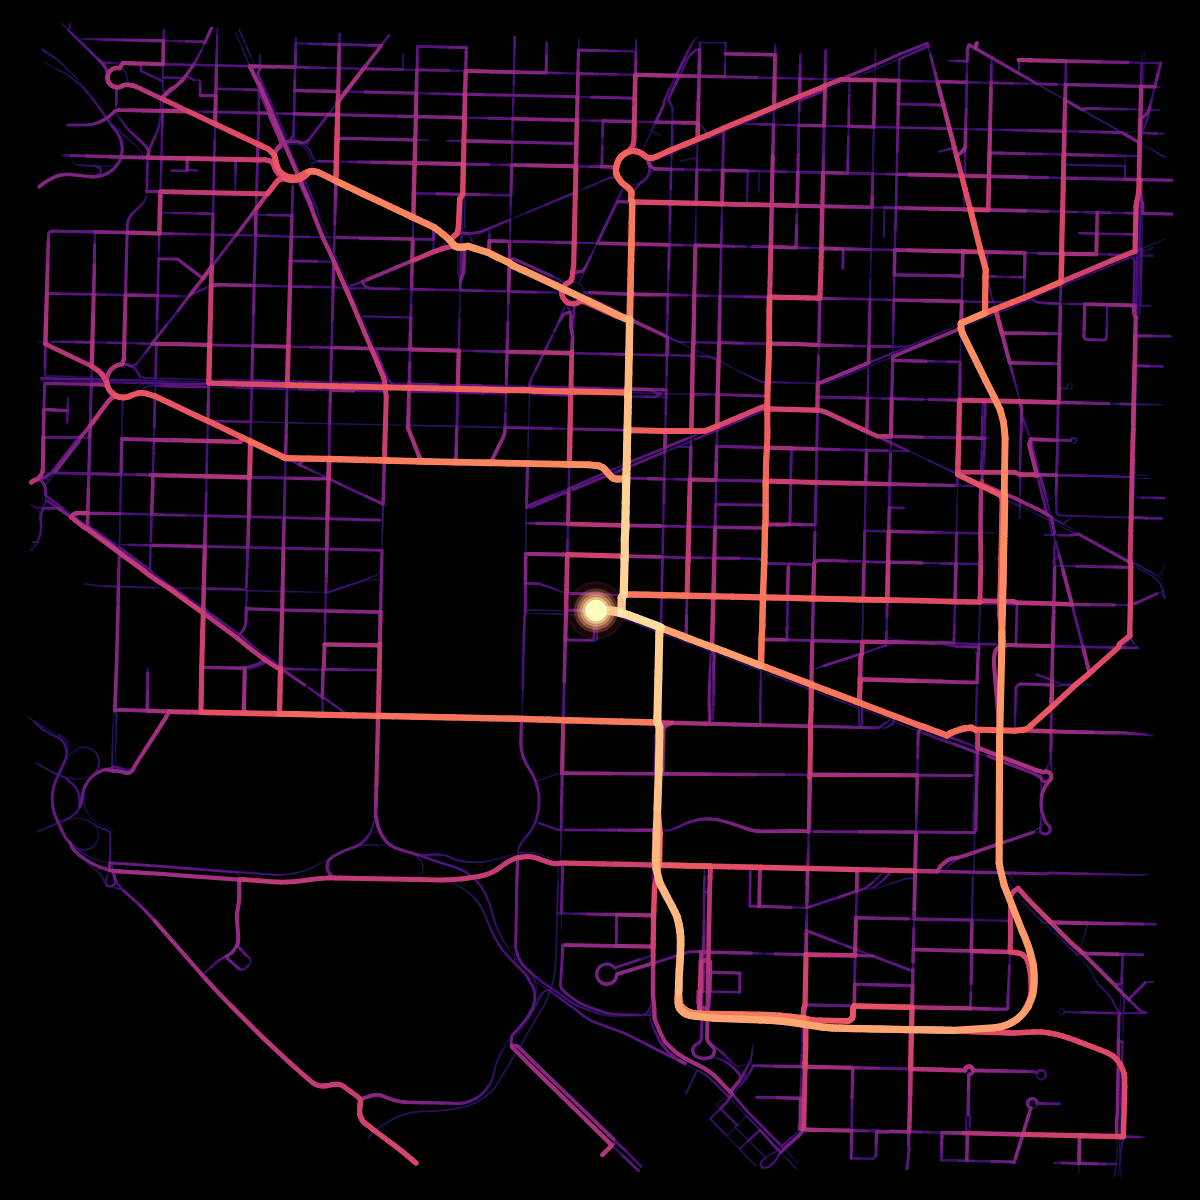

1600 Pennsylvania Avenue Washington DC.2000.basic_example.png
PNG took 0.142 seconds
1600 Pennsylvania Avenue Washington DC.2000.basic_example.png


In [9]:
# Render to a bytes array (PNG). 
# Save it w/ a descriptive/repeatable filename, and also render in the notebook.

fn = ("%s.%s" % (address, distance)).replace(',', '')
print(fn)

from motorshed import render_mpl

rgba_arr = render_mpl.render_layer(Gn, Gge, center_node)

showarray(rgba_arr)

fn = ("%s.%s.basic_example" % (address, distance)).replace(',', '')

fn2 = render_mpl.save_layer(fn, rgba_arr)
print(fn2)

In [10]:
%ls -la *basic_example*

-rw-r--r--  1 rdchambers  staff  125037 Jan  9 11:09 11 Wall Street New York NY.2000.basic_example.png
-rw-r--r--  1 rdchambers  staff  172926 Jan  9 11:05 11 Wall Street New York NY.5000.basic_example.png
-rw-r--r--  1 rdchambers  staff   97398 Mar  3 19:53 1600 Pennsylvania Avenue Washington DC.2000.basic_example.png
